In [1]:
"""
Purpose: To demonstrate how to access the computed features of a neuron
at different resolutions
"""

'\nPurpose: To demonstrate how to access the computed features of a neuron\nat different resolutions\n'

In [2]:
%load_ext autoreload 
%autoreload 2

In [3]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Loading a neuron object

In [4]:
from neurd import neuron_utils as nru

In [5]:
mesh_path = "../Auto_Proof_Pipeline/Single_Soma_Exc/864691134917511946.off"
obj_autoproof_path = "../Auto_Proof_Pipeline/Single_Soma_Exc/864691134917511946_auto_proof.pbz2"
obj_path = "../Auto_Proof_Pipeline/Single_Soma_Exc/864691134917511946.pbz2"

n_exc_single = nru.decompress_neuron(
    filepath=obj_autoproof_path,
    original_mesh=mesh_path
)

mesh_path = "../Auto_Proof_Pipeline/Double_Soma/864691135510518224.off"
obj_autoproof_path = "../Auto_Proof_Pipeline/Double_Soma/864691135510518224_auto_proof.pbz2"
obj_path = "../Auto_Proof_Pipeline/Double_Soma/864691135510518224.pbz2"


n_inh_split = nru.decompress_neuron(
    filepath=obj_autoproof_path,
    original_mesh=mesh_path
)

Decompressing Neuron in minimal output mode...please wait
Decompressing Neuron in minimal output mode...please wait


# Getting Neuron Objects

In [6]:
neuron_obj = n_inh_split

In [ ]:
[k for k in dir(neuron_obj.pipeline_products.auto_proof) if "apical" in k]

# Neuron Attributes: Pipeline Products

In [10]:
neuron_obj.pipeline_products.stages

['decimation',
 'soma_identification',
 'decomposition',
 'multi_soma_split_suggestions',
 'multi_soma_split_execution',
 'cell_type_ax_dendr',
 'auto_proof']

In [21]:
stage = "auto_proof"
[k for k in dir(getattr(
    neuron_obj.pipeline_products,stage))]

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'apical_bbox_volume',
 'apical_bbox_x_max',
 'apical_bbox_x_max_soma_relative',
 'apical_bbox_x_min',
 'apical_bbox_x_min_soma_relative',
 'apical_bbox_y_max',
 'apical_bbox_y_max_soma_relative',
 'apical_bbox_y_min',
 'apical_bbox_y_min_soma_relative',
 'apical_bbox_z_max',
 'apical_bbox_z_max_soma_relative',
 'apical_bbox_z_min',
 'apical_bbox_z_min_soma_relative',
 'apical_branch_length_mean',
 'apical_branch_length_median',
 'apical_n_limbs',
 'apical_n_long_branches',
 'apical_n_medium_branches',
 'apical_n_short_branches',
 'apical_soma_angle_max',
 'apic

### Useful Neuron Attributes: Precomputed Graph

In [28]:
""" 
pipeline_products

--- soma_identification ----
nuclei_meshes
glia_meshes

--- decomposition ----
bbox_[x/y/z]_[min/max](_soma_relative)
branch_length_[mean/median]
n_limbs
n_multi_soma_touching_limbs
n_same_soma_multi_touching_limbs
n_somas
n_spines
skeletal_length
spine_volume_[density/median]
total_spine_volume
width(_no_spine)_[90_perc/median]

--- multi_soma_split_suggestions ---
red_blue_split_points_by_limb
n_paths_cut


# --- cell_type_ax_dendr ---
axon_[mesh/skeleton/limb_branch_dict]
dendrite_[mesh/skeleton/limb_branch_dict]

baylor_cell_type
baylor_cell_type_exc_probability

n_nuclei_in_radius
centroid_[x/y/z](_nm)
[axon/dendrite]_angle_[max/min]
[axon/dendrite]_bbox_[x/y/z]_[min/max](_soma_relative)
[axon/dendrite]_skeleton
n_syn_axon_[ais/bouton/non_bouton]_[presyn/postsyn]

neuron_graph_axon_labeled
neuron_graph_high_fid_axon

spine_density
spine_volume_density
syn_density_[head/neck/shaft/no_head]


--- auto proofreading
# --- neuron_obj.pipeline_products.auto_proof.neuron_graph_after_proof
[compartment]_[mesh/skeleton/limb_branch_dict]
[compartment]_soma_angle_[max/min]
[compartment]_bbox_[x/y/z]_[min/max](_soma_relative)
[compartment]_n_limbs
[compartment]_branch_length_[mean/median]
n_syn_[compartment](_[head/neck/shaft/no_head)(_[postsyn/presyn])
n_boutons
spine(_volume)_density
syn_density_[head/neck/shaft/no_head]_after_proof
spine_density
spine_volume_density


[error_filter]_error_[length/area]
split_locations_before_filter # dict: error_filter > limb > locations

neuron_graph_after_proof
"""
print('')

In [29]:
# Accessing pipeline products
neuron_obj.syn_density_head_after_proof

0.3698102137825556

In [31]:
# Could be explicit with long path but don't have to
neuron_obj.pipeline_products.cell_type_ax_dendr.axon_skeleton

array([[[1430163.        ,  633318.        , 1114281.        ],
        [1430219.63495774,  633240.18511971, 1114253.84625314]],

       [[1430219.63495774,  633240.18511971, 1114253.84625314],
        [1430300.09656116,  633199.37674393, 1114221.26708781]],

       [[1430300.09656116,  633199.37674393, 1114221.26708781],
        [1430390.24092798,  633173.60721298, 1114186.48312018]],

       ...,

       [[1521151.60746294,  561572.57032263, 1027948.59722616],
        [1521208.85462696,  561651.75378932, 1027927.31951918]],

       [[1521208.85462696,  561651.75378932, 1027927.31951918],
        [1521239.15848797,  561737.7600367 , 1027927.3132188 ]],

       [[1521239.15848797,  561737.7600367 , 1027927.3132188 ],
        [1521233.        ,  561824.8       , 1027954.        ]]])

# Neuron Attributes

In [33]:
dir(neuron_obj)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_index',
 '_mesh_kdtree',
 'align_matrix',
 'apical_limb_branch_dict',
 'apical_shaft_limb_branch_dict',
 'apical_tuft_limb_branch_dict',
 'area',
 'area_with_somas',
 'axon_area',
 'axon_classification',
 'axon_length',
 'axon_limb',
 'axon_limb_branch_dict',
 'axon_limb_idx',
 'axon_limb_name',
 'axon_mesh',
 'axon_on_dendrite_limb_branch_dict',
 'axon_skeleton',
 'axon_starting_branch',
 'axon_starting_coordinate',
 'basal_limb_branch_dict',
 'boutons',
 'boutons_volume',
 'calculate_decomposition_products',
 'calculate_multi_soma_sp

In [34]:
neuron_attributes = [
    "limb_mesh_volume", #calculated from limbs
    "mesh_volume_with_somas",
    "axon_starting_coordinate",
    "same_soma_multi_touching_limbs",
    "multi_soma_touching_limbs",
    "n_limbs",
    "n_somas",
    "n_branches_per_limb",
    "n_branches",

    # --- spine attributes
    "spines",
    "synapses",
]

## Neuron attributes: accessing examples

In [37]:
neuron_obj.n_limbs

5

In [39]:
neuron_obj.get_soma_meshes()

[<trimesh.Trimesh(vertices.shape=(11386, 3), faces.shape=(22560, 3))>]

## Neuron Attributes: Visualizing

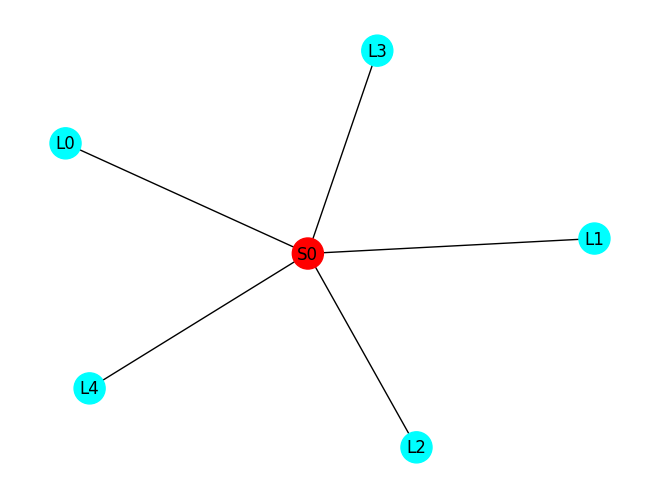

In [32]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_limb_concept_network(neuron_obj)


 Working on visualization type: mesh


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

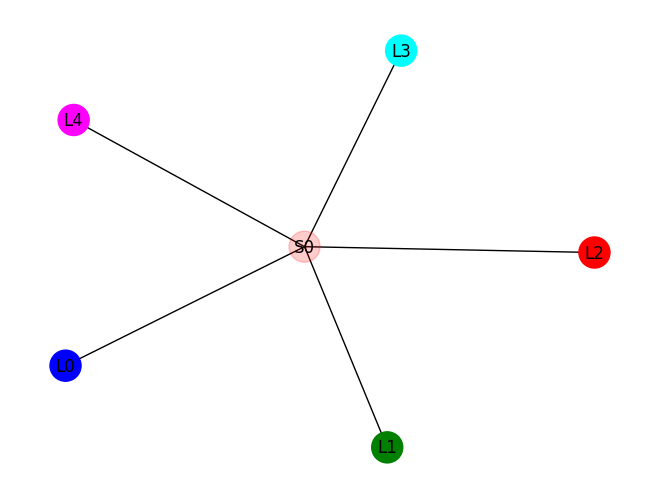

In [64]:
nviz.visualize_neuron_limbs(neuron_obj)

In [70]:
nviz.plot_spines_head_neck(neuron_obj)


 Working on visualization type: mesh


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [74]:
nviz.plot_synapses(neuron_obj)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Soma Attributes

In [41]:
"""
Can access soma objects using dictionary like indexing 
(set up for multiple possible somas in one neuron object)
"""
soma_obj = neuron_obj["S0"]
soma_obj

In [45]:
[k for k in dir(soma_obj) if k[0] != "_"]

['area',
 'compartment',
 'mesh',
 'mesh_center',
 'mesh_face_idx',
 'n_synapses',
 'n_synapses_post',
 'n_synapses_pre',
 'sdf',
 'side_length_ratios',
 'synapses',
 'synapses_post',
 'synapses_pre',
 'volume',
 'volume_ratio']

# Limb Attributes

In [40]:
"""
Can access the limbs of a neuron with list or dictionary like indexing

#list like indexing
limb_obj = neuron_obj[0]

#dictionary like indexing
limb_obj = neuron_obj["L0"]

"""
# accessing the first limb
limb_obj = neuron_obj[0]
limb_obj = neuron_obj["L0"]

In [46]:
[k for k in dir(limb_obj) if k[0] != "_"]

['all_concept_network_data',
 'all_starting_coordinates',
 'all_starting_nodes',
 'area',
 'axon_spines',
 'boutons',
 'boutons_volume',
 'branch_objects',
 'compute_boutons_volume',
 'compute_spines_volume',
 'concept_network',
 'concept_network_data_by_soma',
 'concept_network_data_by_starting_node',
 'concept_network_directional',
 'convert_concept_network_to_directional',
 'created_edges',
 'current_soma_group_idx',
 'current_starting_coordinate',
 'current_starting_endpoints',
 'current_starting_node',
 'current_starting_soma',
 'current_touching_soma_vertices',
 'deleted_edges',
 'divided_skeletons',
 'find_branch_by_skeleton_coordinate',
 'get_attribute_dict',
 'get_branch_names',
 'get_computed_attribute_data',
 'get_concept_network_data_by_soma',
 'get_concept_network_data_by_soma_and_idx',
 'get_skeleton',
 'get_skeleton_soma_starting_node',
 'get_soma_by_starting_node',
 'get_soma_group_by_starting_node',
 'get_starting_branch_by_soma',
 'labels',
 'limb_correspondence',
 'm

# Limb Attributes: Visualization

limb_name = L0

 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

No limb name was given so using L0 because was the limb in the first key


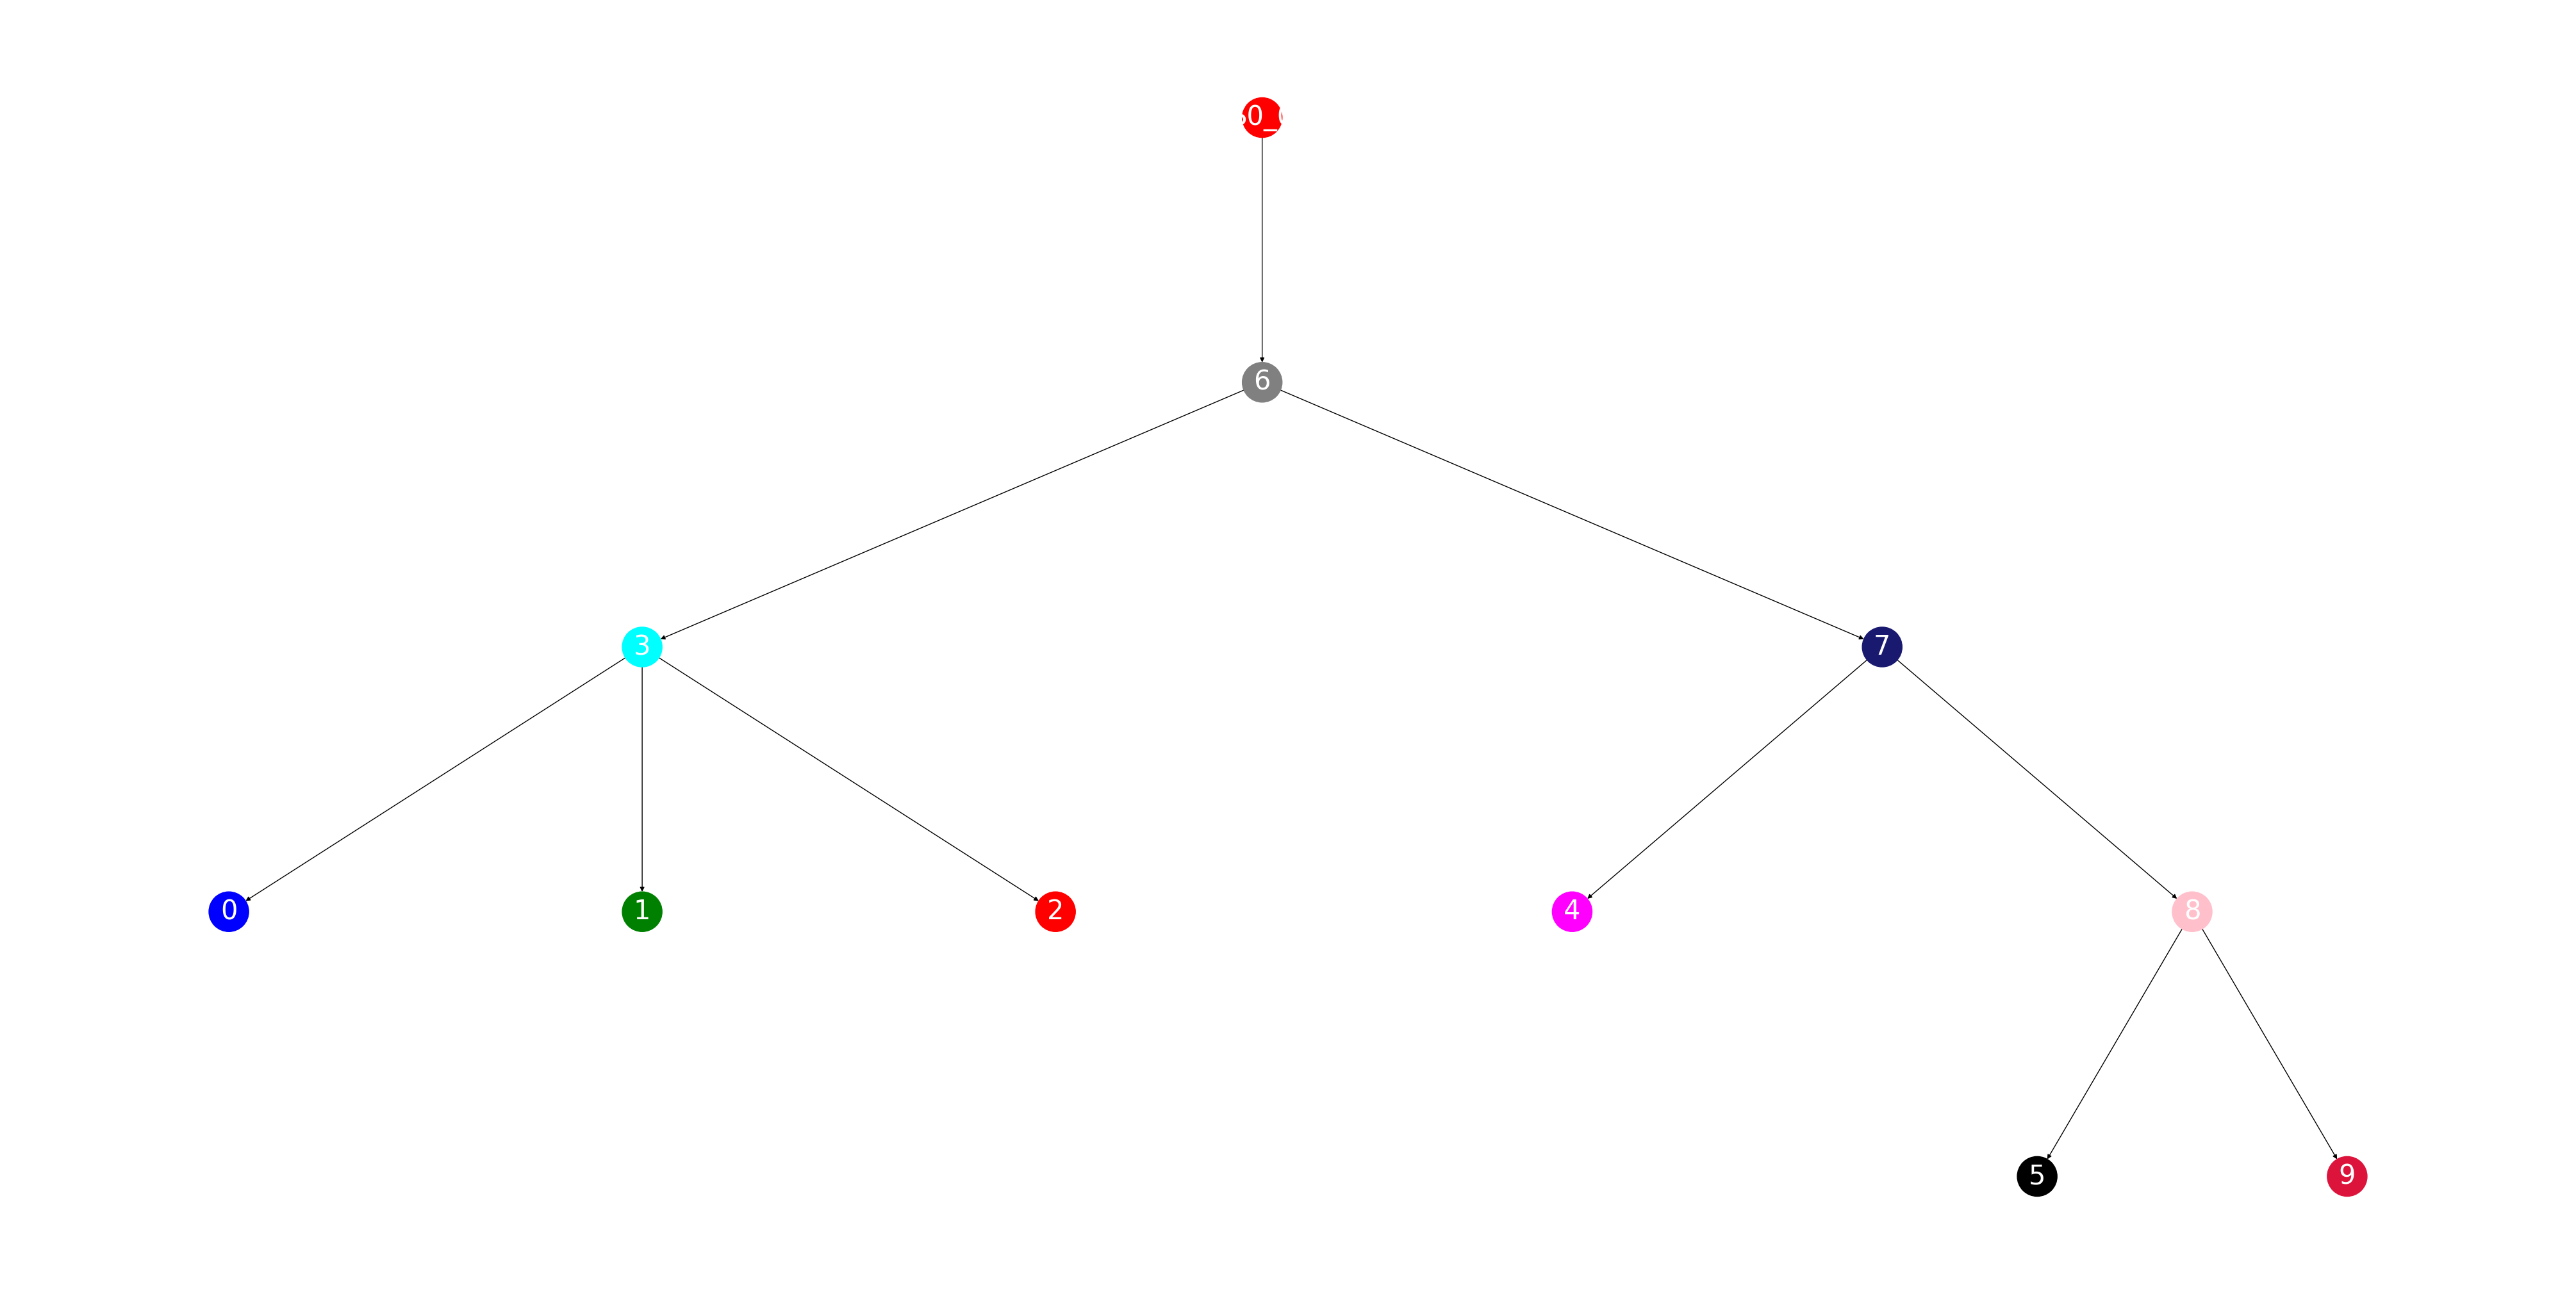

In [66]:
nviz.plot_limb_idx(
    neuron_obj,
    0,
    
)

In [67]:
nviz.plot_axon(neuron_obj)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Branch Attributes

In [47]:
"""
Can access the branches of a neuron like a nested list within the 
limb objects

#list like indexing
branch_obj = neuron_obj[2][0]

#dictionary like indexing
limb_obj = neuron_obj["L2"][0]

"""

'\nCan access the branches of a neuron like a nested list within the \nlimb objects\n\n#list like indexing\nbranch_obj = neuron_obj[2][0]\n\n#dictionary like indexing\nlimb_obj = neuron_obj["L2"][0]\n\n'

In [48]:
limb_obj = neuron_obj[0]
branch_obj = limb_obj[5]

In [62]:
limb_obj.set_branches_endpoints_upstream_downstream_idx()

In [63]:
branch_obj.endpoint_downstream

array([1491216.77925298,  642119.08343627, 1068969.86108359])

In [49]:
[k for k in dir(branch_obj) if k[0] != "_"]

['area',
 'axon_compartment',
 'boutons',
 'boutons_cdfs',
 'boutons_volume',
 'calculate_endpoints',
 'compartment',
 'compute_boutons_volume',
 'compute_spines_volume',
 'endpoint_downstream',
 'endpoint_downstream_with_offset',
 'endpoint_downstream_x',
 'endpoint_downstream_y',
 'endpoint_downstream_z',
 'endpoint_upstream',
 'endpoint_upstream_with_offset',
 'endpoint_upstream_x',
 'endpoint_upstream_y',
 'endpoint_upstream_z',
 'endpoints',
 'endpoints_nodes',
 'endpoints_upstream_downstream_idx',
 'head_neck_shaft_idx',
 'labels',
 'mesh',
 'mesh_center',
 'mesh_center_x',
 'mesh_center_y',
 'mesh_center_z',
 'mesh_face_idx',
 'mesh_shaft',
 'mesh_shaft_idx',
 'mesh_volume',
 'min_dist_synapses_post_downstream',
 'min_dist_synapses_post_upstream',
 'min_dist_synapses_pre_downstream',
 'min_dist_synapses_pre_upstream',
 'n_boutons',
 'n_spines',
 'n_synapses',
 'n_synapses_head',
 'n_synapses_neck',
 'n_synapses_no_head',
 'n_synapses_post',
 'n_synapses_pre',
 'n_synapses_shaft'

## Branch Attributes: Plotting

In [50]:
nviz.plot_branch_spines(branch_obj)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Neuron Graph Lite

In [ ]:
"""
The neuron object exported as a simple networkx DiGraph with 
all of the attributes of the graphes 
"""

In [51]:
G_axon = neuron_obj.pipeline_products.cell_type_ax_dendr.neuron_graph_high_fid_axon
G_axon = neuron_obj.neuron_graph_high_fid_axon

G_proof = neuron_obj.pipeline_products.auto_proof.neuron_graph_after_proof
G_proof = neuron_obj.neuron_graph_after_proof

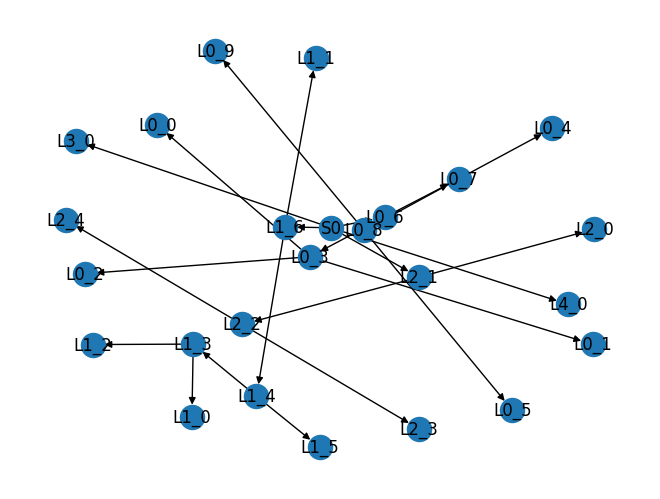

In [55]:
import networkx as nx
nx.draw(G_proof,with_labels = True)

## neuron_morphology_tools: Utility Library for Visualizing and Measuring Features of Neuron Lite objects

In [52]:
from neuron_morphology_tools import neuron_nx_utils as nxu

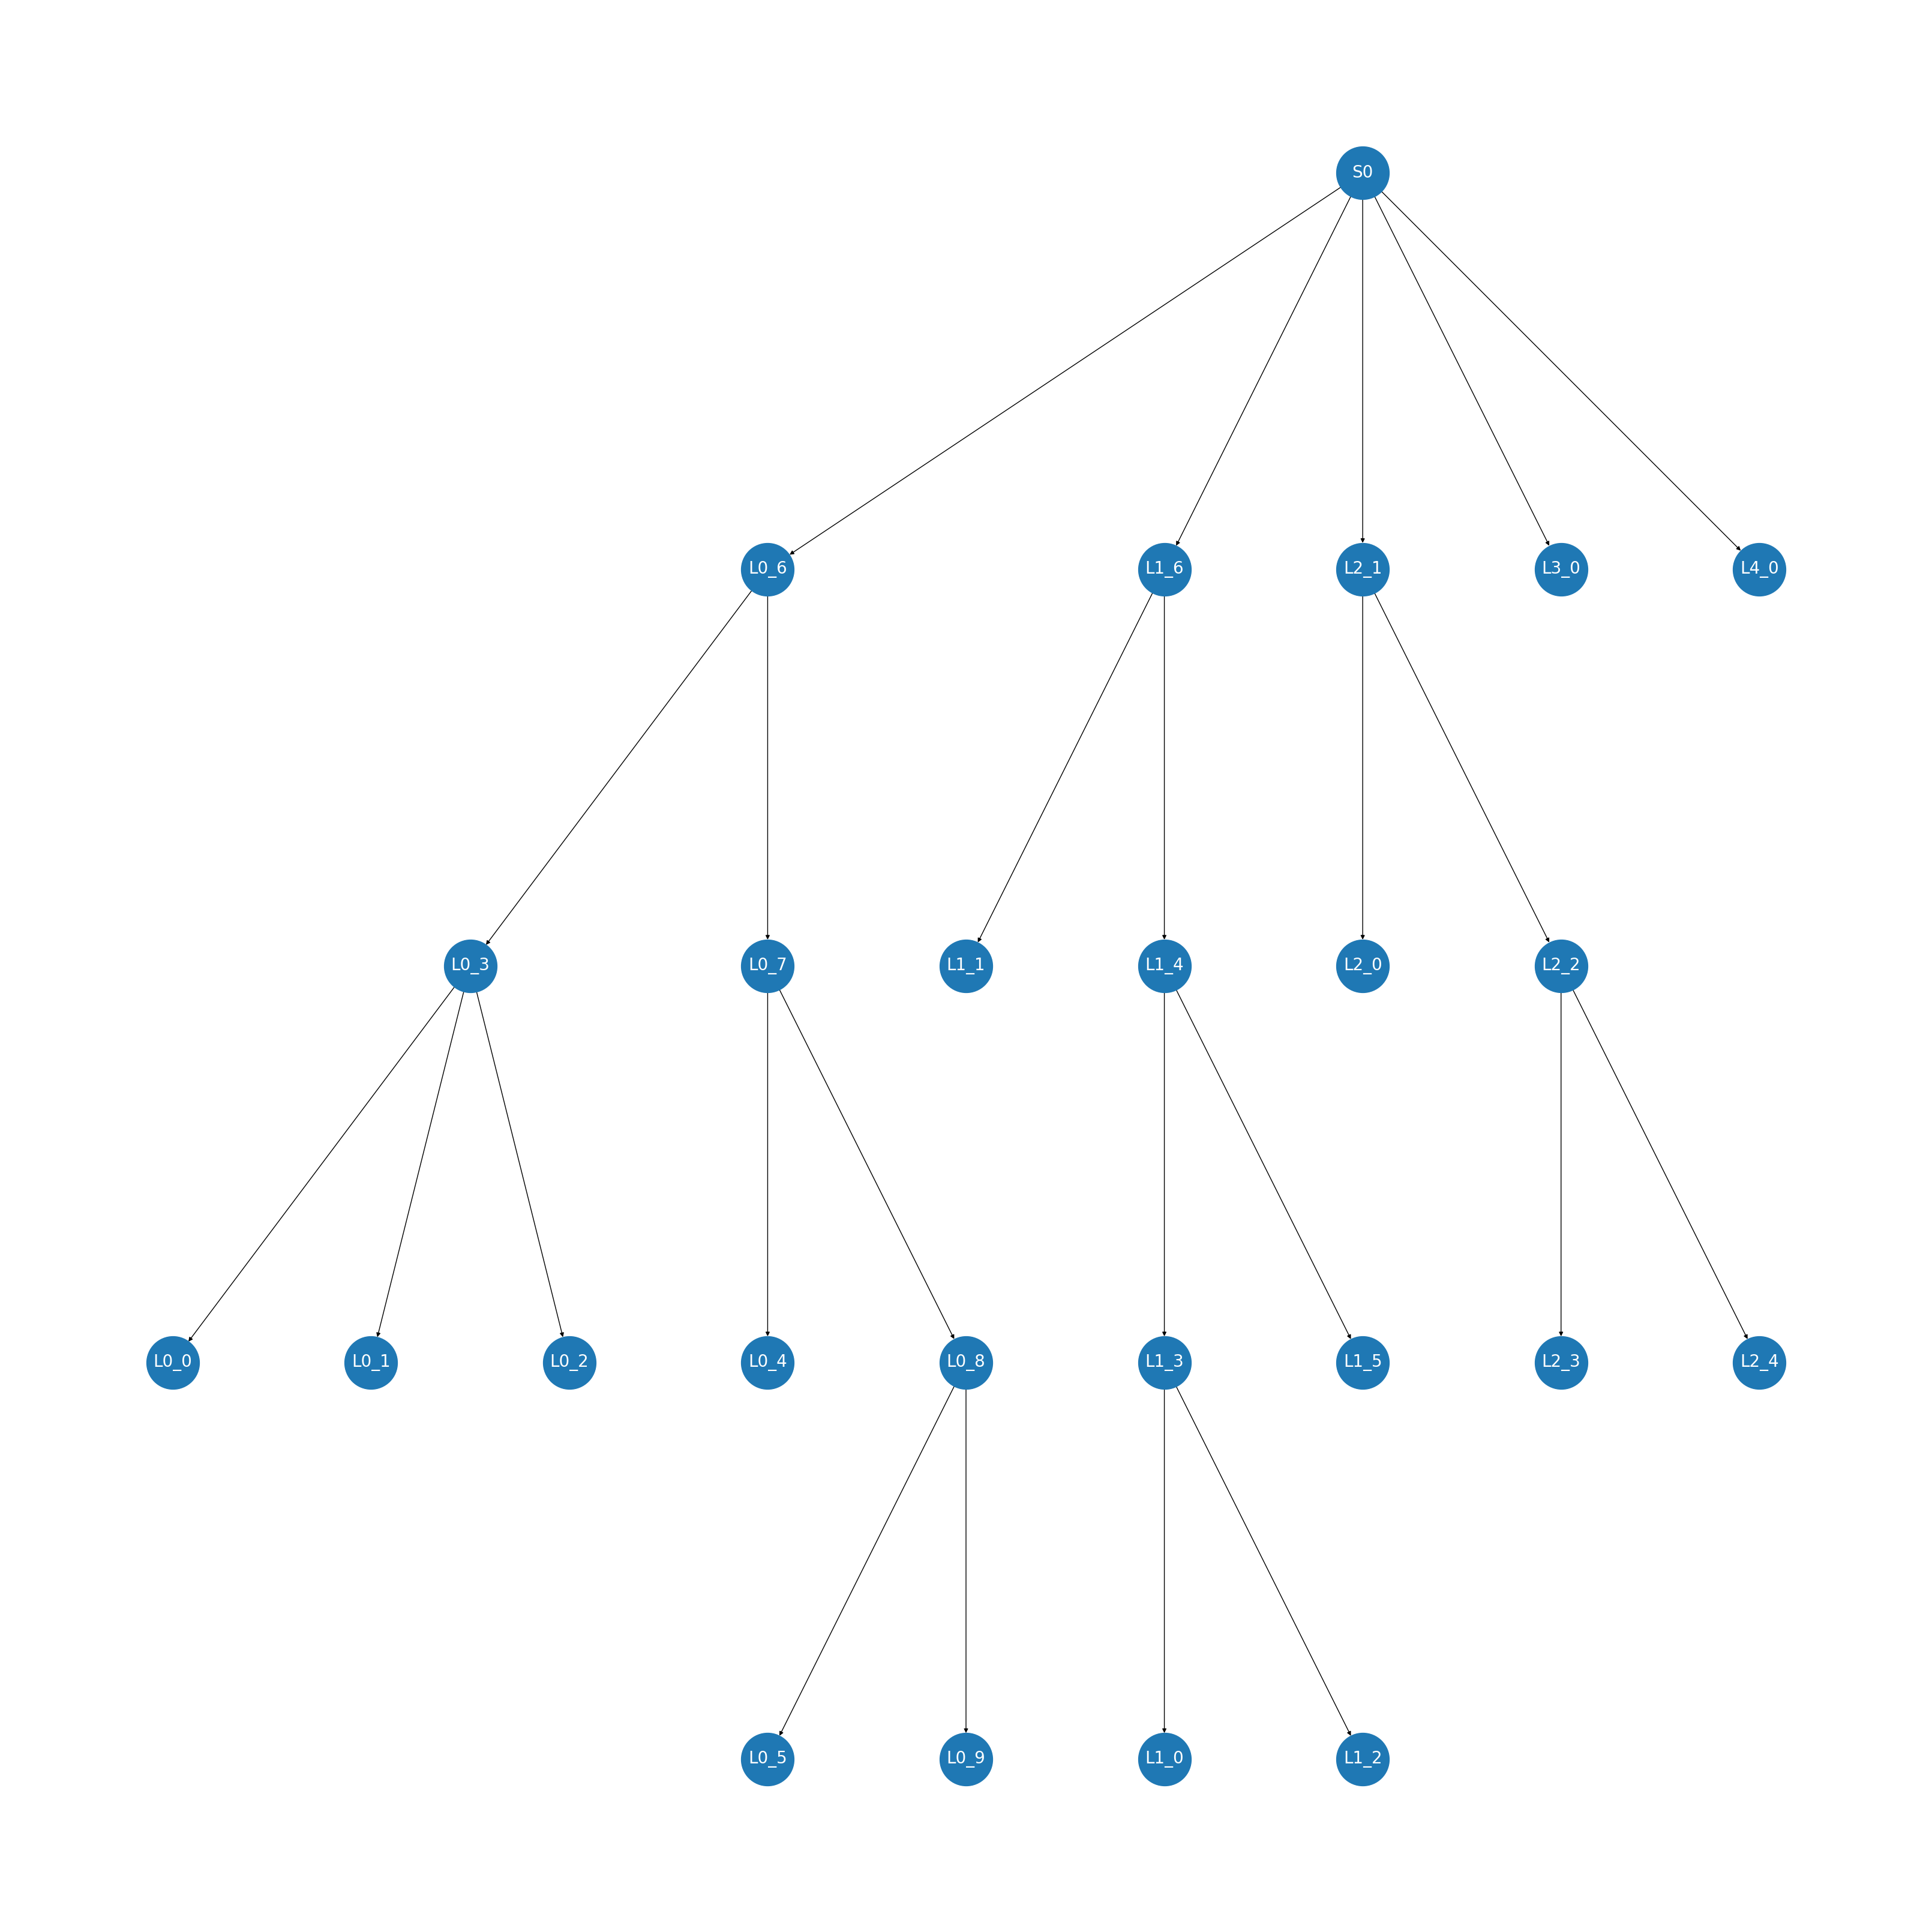

In [57]:
nxu.draw_tree(G_proof)

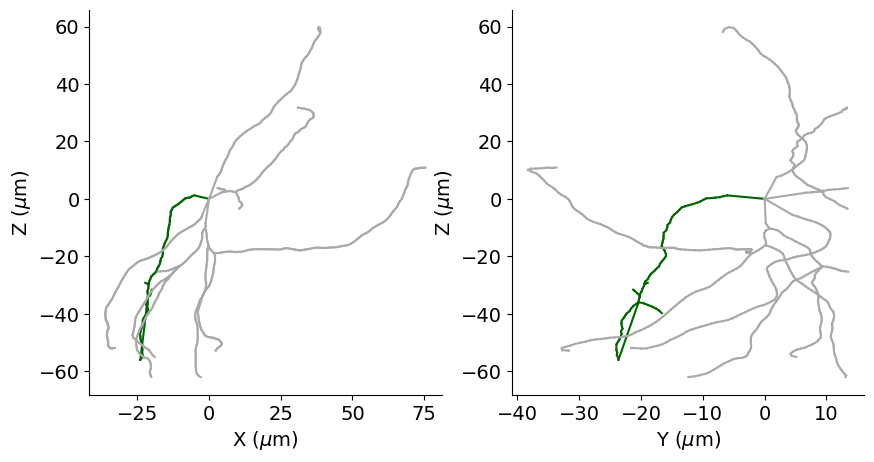

In [56]:
nxu.plot(G_proof)

In [53]:
nxu.plot_all_skeleton_compartments(G_proof)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [58]:
# accessing node attributes
G_proof.nodes["L0_5"]

{'area': 127.06485214684831,
 'compartment': 'basal',
 'axon_compartment': 'dendrite',
 'boutons_cdfs': None,
 'boutons_volume': None,
 'labels': ['basal'],
 'mesh_center': array([1488554.20821918,  628876.891621  , 1083289.18744292]),
 'endpoint_upstream': array([1490650.,  608251., 1098660.]),
 'endpoint_downstream': array([1491216.77925298,  642119.08343627, 1068969.86108359]),
 'mesh_volume': 10.616335577534016,
 'n_boutons': 0,
 'n_spines': 23,
 'n_synapses': 46,
 'n_synapses_head': 18,
 'n_synapses_neck': 0,
 'n_synapses_no_head': 6,
 'n_synapses_post': 46,
 'n_synapses_pre': 0,
 'n_synapses_shaft': 22,
 'n_synapses_spine': 24,
 'skeletal_length': 53093.85278950429,
 'spine_density': 0.00043319515897981113,
 'spine_volume_density': 41189.19143119908,
 'spine_volume_median': 79861134.65003458,
 'synapse_density': 0.0008663903179596223,
 'synapse_density_post': 0.0008663903179596223,
 'synapse_density_pre': 0.0,
 'total_spine_volume': 2186892866.3667955,
 'width': 303.6221499344136